In [1]:
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
from keras.layers.recurrent import LSTM

In [3]:
from keras.models import Sequential

In [4]:
import lstm, time

In [5]:
X_train, y_train, X_test, y_test = lstm.load_data("sp500.csv", 50, True)

In [11]:
model = Sequential()

In [12]:
model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss="mse", optimizer="rmsprop")

In [15]:
model.fit(X_train, y_train, batch_size=512, nb_epoch=3, validation_split=0.2)

Train on 2967 samples, validate on 742 samples
Epoch 1/3
2967/2967 [==============================] - 5s - loss: 7.1757e-04 - val_loss: 5.4037e-04
Epoch 2/3
2967/2967 [==============================] - 4s - loss: 6.2109e-04 - val_loss: 6.0773e-04
Epoch 3/3
2967/2967 [==============================] - 5s - loss: 7.4823e-04 - val_loss: 5.2984e-04


yo


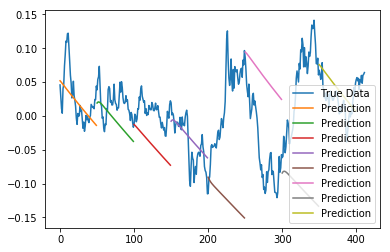

In [16]:
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)